In [1]:
import pandas as pd
import numpy as np

import emoji

import nltk
import nltk.corpus

In [2]:
from wordcloud import WordCloud

### Functions

In [7]:
import emoji
def clean_hashtags(tag):
    # make all tweet text lower case 
    tag = tag.lower()

    # remove any links from tweets 
    tag = re.sub(r'https?:\/\/\S+', '', tag)

    # remove new line 
    tag = re.sub(r'\n', '', tag)

    # remove any emojis
    tag = emoji.replace_emoji(tag, replace='')
    
    # Remove punctuation, URLS and @mentions
    tag = re.sub(r"(@\S+)|(#\S+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", tag)
    return tag

In [23]:
def plot_common(words, title):
    word_list = [x[0] for x in words]
    word_freq = [x[1] for x in words]
    
    fig, ax = plt.subplots(figsize = (8,8))
    y_pos = np.arange(len(word_list))
    ax.barh(y_pos ,list(word_freq)[::-1], align='center', color='steelblue', edgecolor='black', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(word_list)[::-1])
    ax.set_xlabel("Number of appereances")
    ax.set_title(title, fontsize = 20)
    plt.tight_layout(pad=3)
    plt.show()

In [27]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
def find_common_words(df):
    words = df['clean_spacy'].apply(lambda x: word_tokenize(x)).sum()  
    fdist = FreqDist(words)
    return fdist.most_common(15)

In [24]:
from collections import Counter
import ast
import re
def find_common_hashtags(df):
    df_copy = df.copy()
    df_copy['hashtags'] = df_copy['hashtags'].apply(lambda x: ast.literal_eval(x))
    all_hashtags = sum([tag.split('#') for tag in df_copy['hashtags'].sum()], [])
    all_hashtags = [clean_hashtags(tag) for tag in all_hashtags if tag]  # removes empty strings from splitting hashtags

    top_hashtags = Counter(all_hashtags).most_common(10)
    
    return top_hashtags

### Load data

In [3]:
# load dataset with sentiment columns
tweet_data = pd.read_csv('data_lg_clean_sentiment.csv').dropna()

In [4]:
tweet_data = tweet_data[tweet_data['created_at']!='0']
tweet_data['created_at'] = pd.to_datetime(tweet_data['created_at'], format="%Y-%m-%d %H:%M:%S")
tweet_data = tweet_data.set_index('created_at')

In [5]:
pos_df = tweet_data[tweet_data['sentiment']=='pos']
neg_df = tweet_data[tweet_data['sentiment']=='neg']
neu_df = tweet_data[tweet_data['sentiment']=='neu']

In [6]:
pos = pos_df.resample('D').agg('count')['tweet']
neg = neg_df.resample('D').agg('count')['tweet']
neu = neu_df.resample('D').agg('count')['tweet']

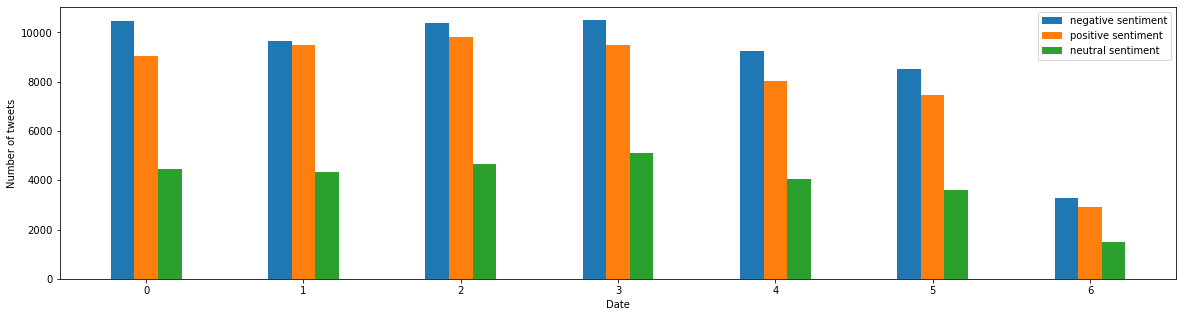

In [7]:
import matplotlib.pyplot as plt
width = 0.3
plt.bar(np.arange(len(neg))-width/2, neg, width=width/2,label='negative sentiment')
plt.bar(np.arange(len(pos)), pos, width=width/2, label='positive sentiment')
plt.bar(np.arange(len(neu))+width/2, neu, width=width/2, label='neutral sentiment')
plt.legend()
plt.ylabel('Number of tweets')
plt.xlabel('Date')
plt.gcf().set_size_inches(20,5)

### Wordclouds

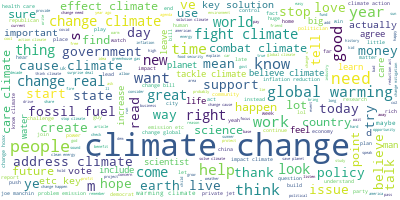

In [16]:
from nltk.tokenize import word_tokenize

words = ','.join(pos_df['clean_spacy'].apply(lambda x: word_tokenize(x)).sum())
wordcloud = WordCloud(background_color='white', max_words=500, contour_width=3, contour_color='steel_blue')
wordcloud.generate(words)
wordcloud.to_image()

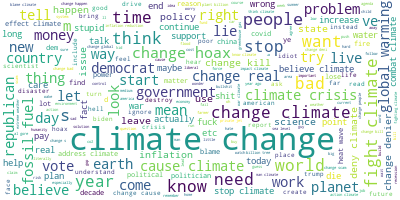

In [17]:
words = ','.join(neg_df['clean_spacy'].apply(lambda x: word_tokenize(x)).sum())
wordcloud = WordCloud(background_color='white', max_words=500, contour_width=3, contour_color='steel_blue')
wordcloud.generate(words)
wordcloud.to_image()

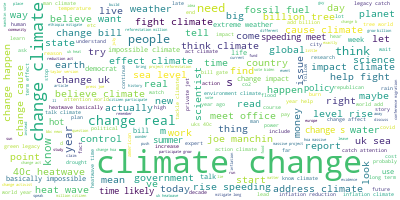

In [18]:
words = ','.join(neu_df['clean_spacy'].apply(lambda x: word_tokenize(x)).sum())
wordcloud = WordCloud(background_color='white', max_words=500, contour_width=3, contour_color='steel_blue')
wordcloud.generate(words)
wordcloud.to_image()

### Common hashtags for different sentiments

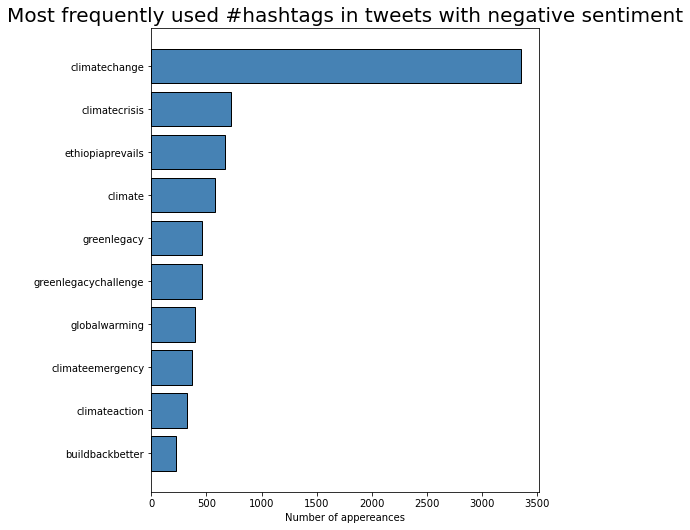

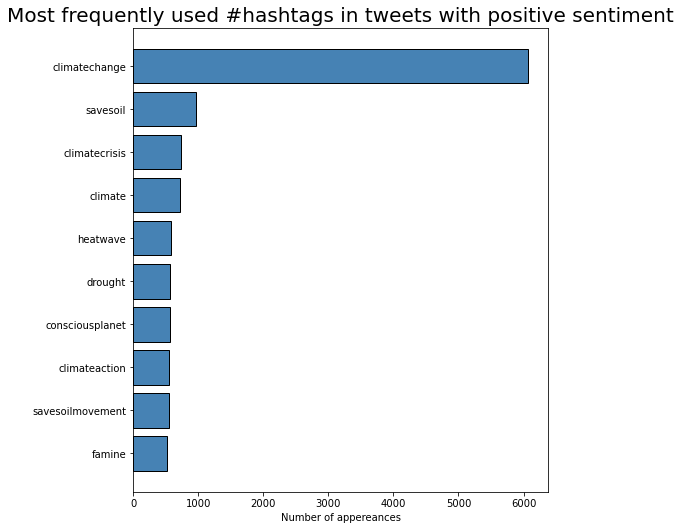

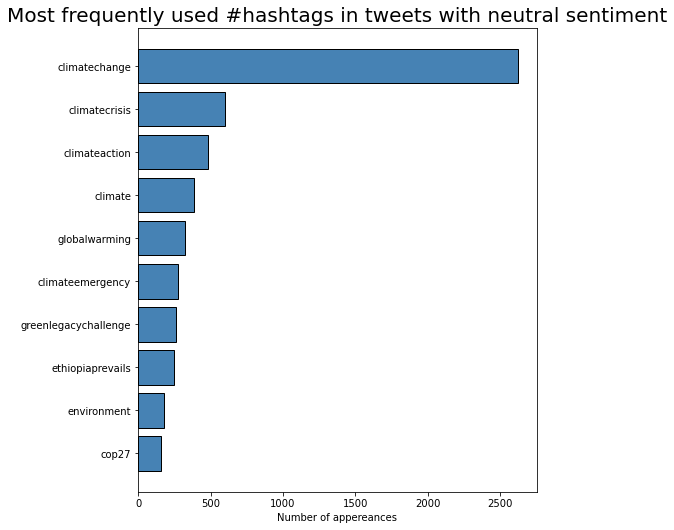

In [26]:
common_hashtags_neg = find_common_hashtags(neg_df)
plot_common(common_hashtags_neg, 'Most frequently used #hashtags in tweets with negative sentiment')

common_hashtags_pos = find_common_hashtags(pos_df)
plot_common(common_hashtags_pos, 'Most frequently used #hashtags in tweets with positive sentiment')

common_hashtags_neu = find_common_hashtags(neu_df)
plot_common(common_hashtags_neu, 'Most frequently used #hashtags in tweets with neutral sentiment')

### Common words for each sentiment

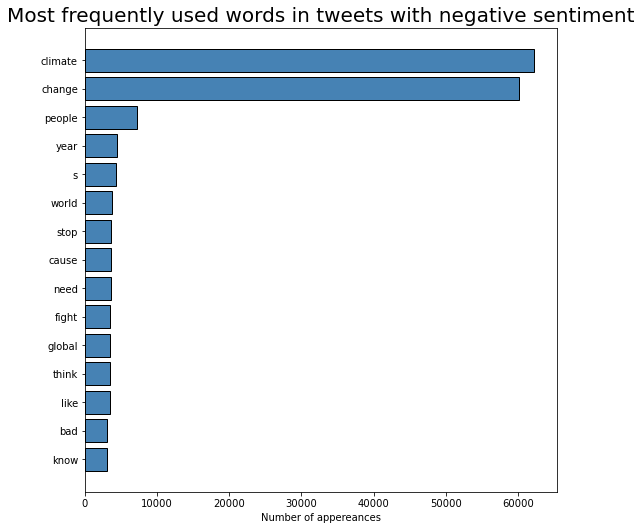

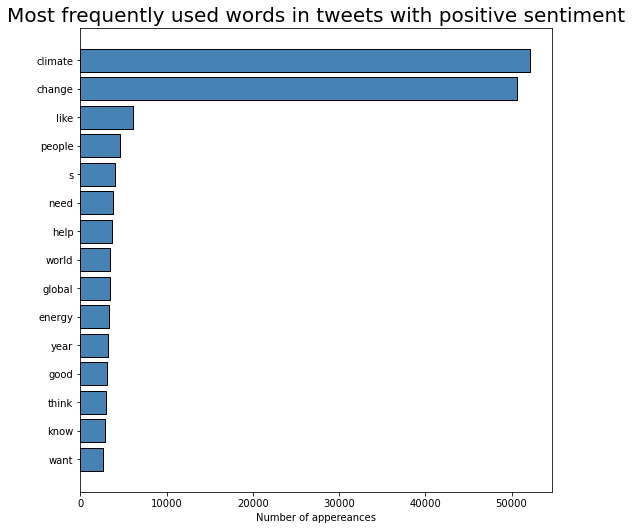

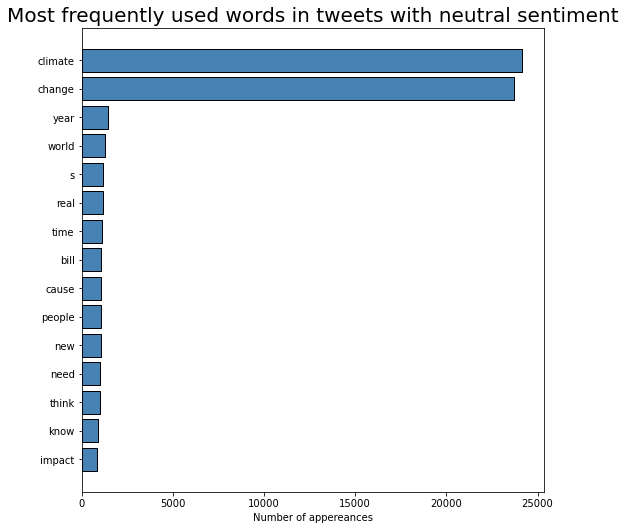

In [39]:
common_words_neg = find_common_words(neg_df)
plot_common(common_words_neg, 'Most frequently used words in tweets with negative sentiment')

common_words_pos = find_common_words(pos_df)
plot_common(common_words_pos, 'Most frequently used words in tweets with positive sentiment')

common_words_neu = find_common_words(neu_df)
plot_common(common_words_neu, 'Most frequently used words in tweets with neutral sentiment')

### Find most frequent word on each day

/var/folders/87/clmyfqwn0kz2jfcyp0cbjycc0000gn/T/ipykernel_4862/3815214707.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  sub = pos_df[pos_df.index.date == date]


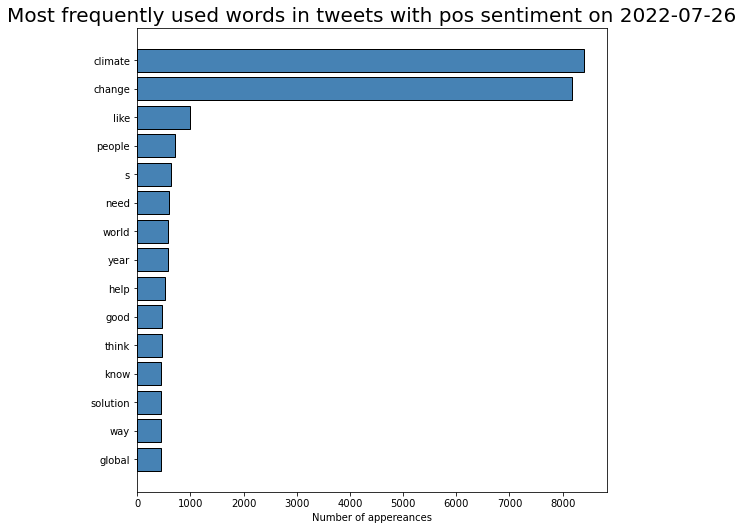

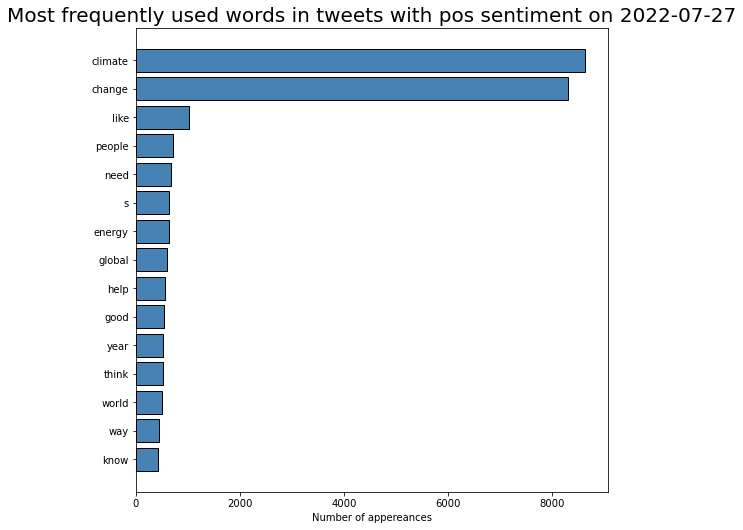

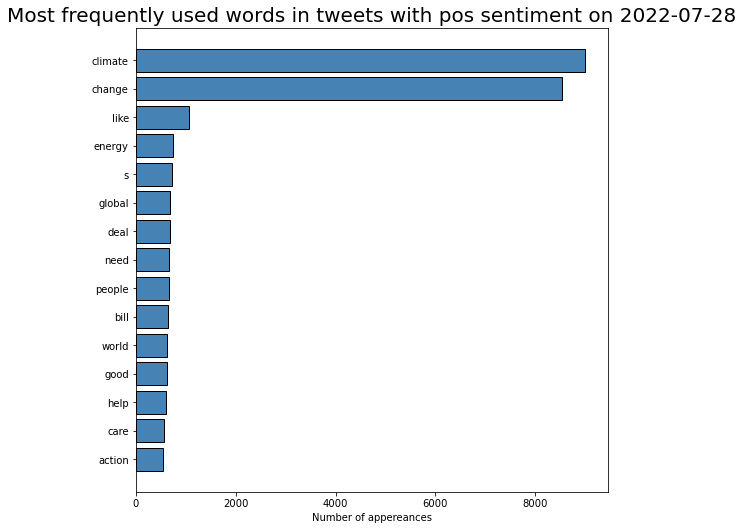

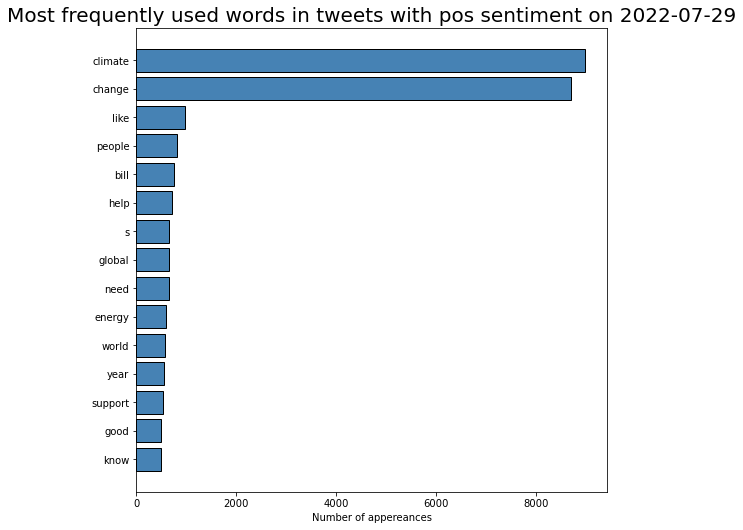

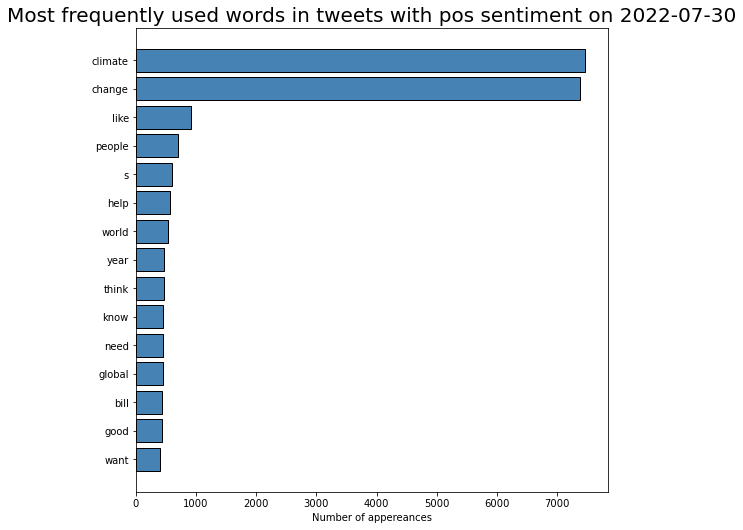

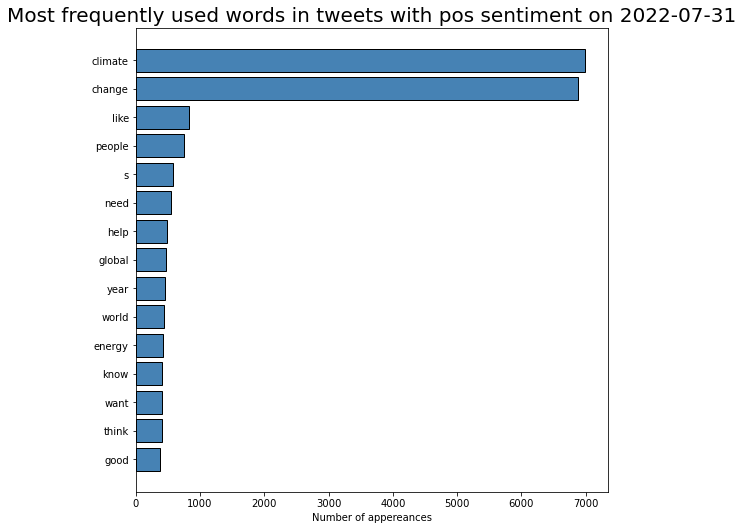

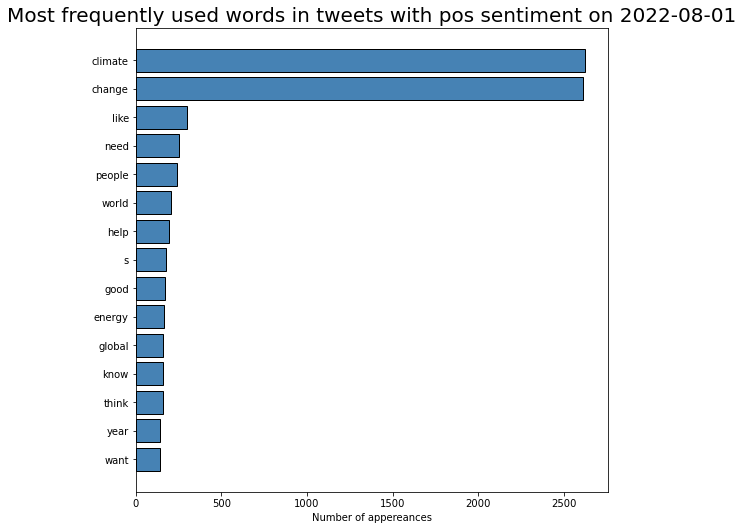

In [36]:
dates = pos.index
for date in dates:
    sub = pos_df[pos_df.index.date == date]
    common_words = find_common_words(sub)
    plot_common(common_words, f'Most frequently used words in tweets with pos sentiment on {date:%Y-%m-%d}')

/var/folders/87/clmyfqwn0kz2jfcyp0cbjycc0000gn/T/ipykernel_4862/521618071.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  sub = neg_df[neg_df.index.date == date]


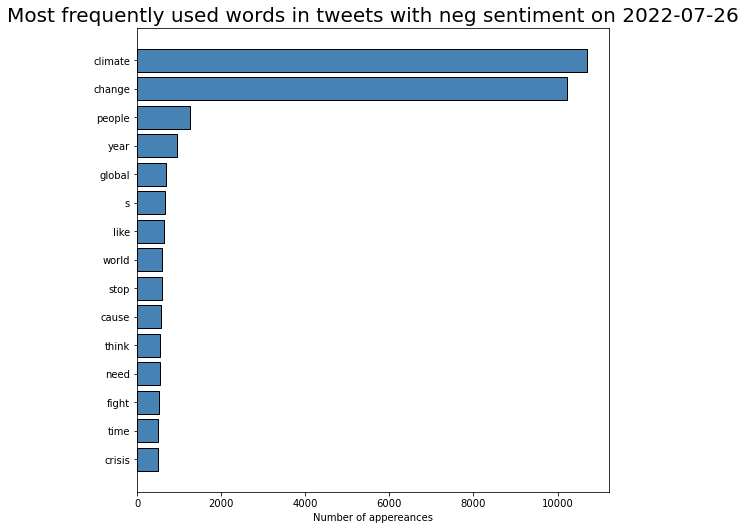

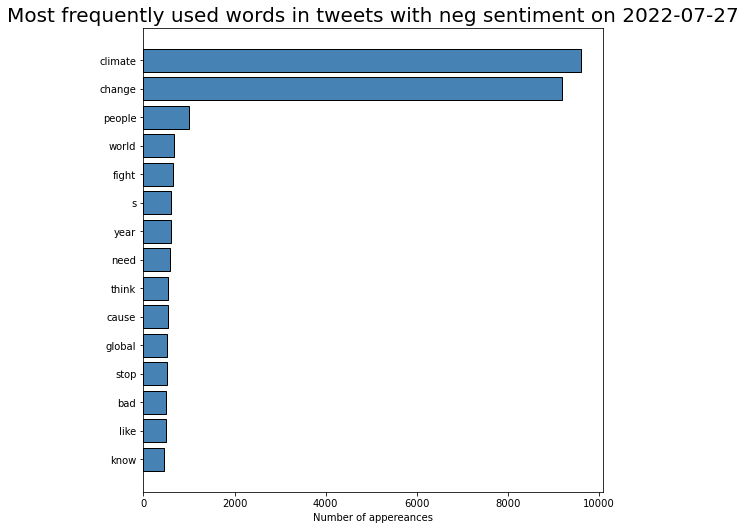

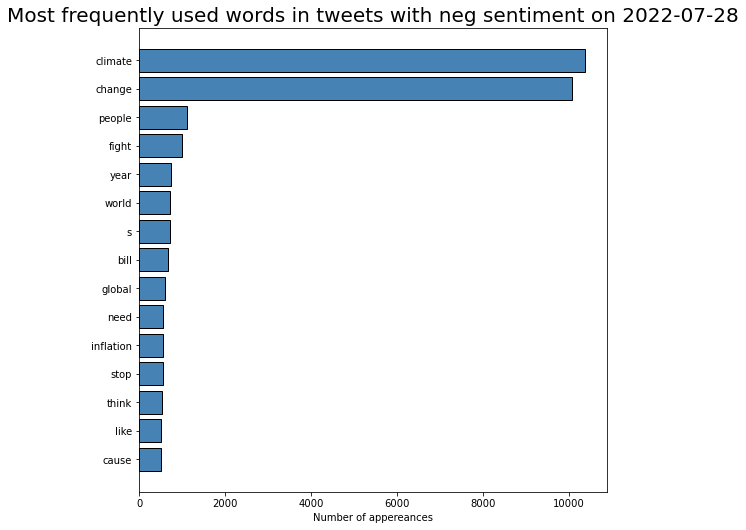

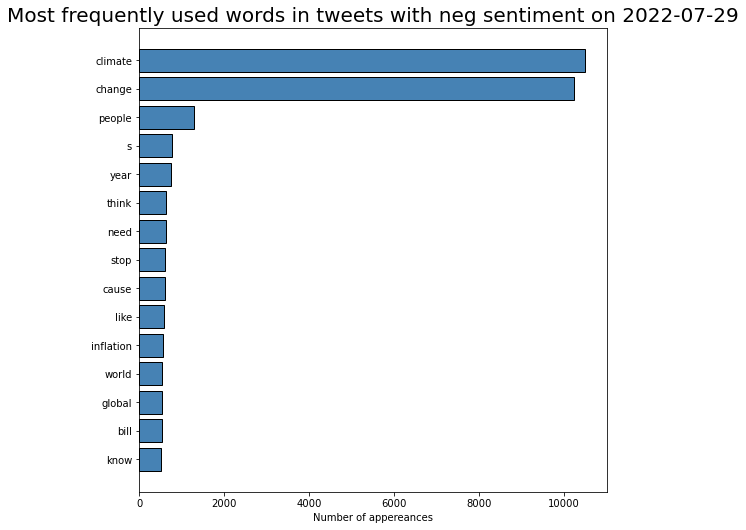

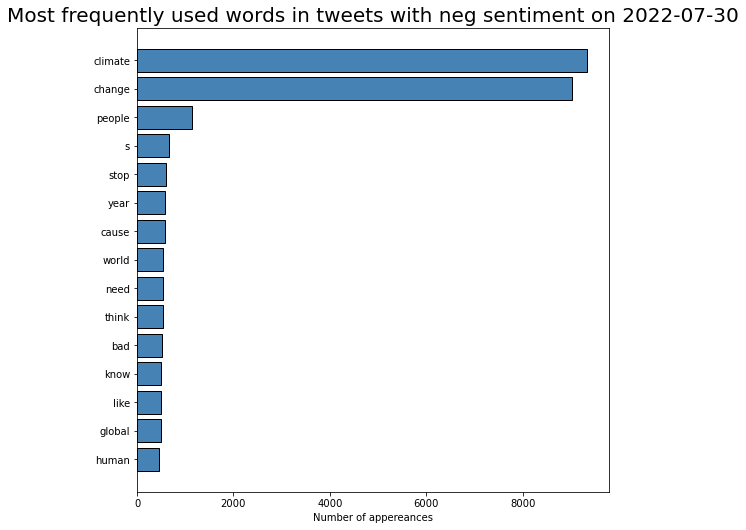

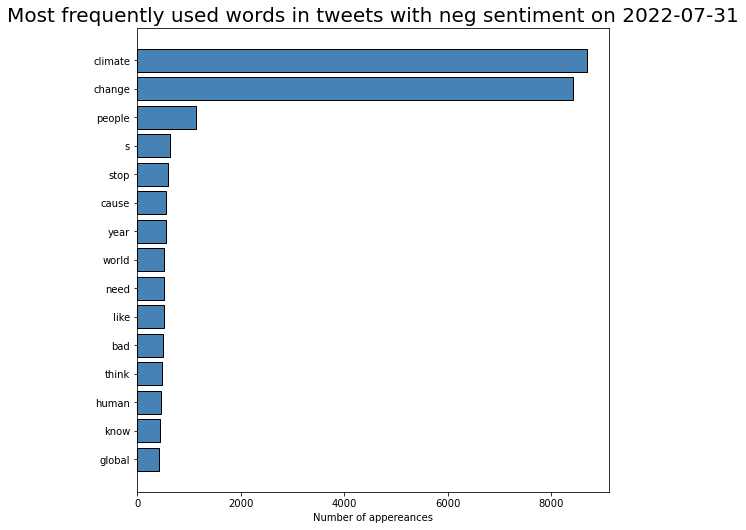

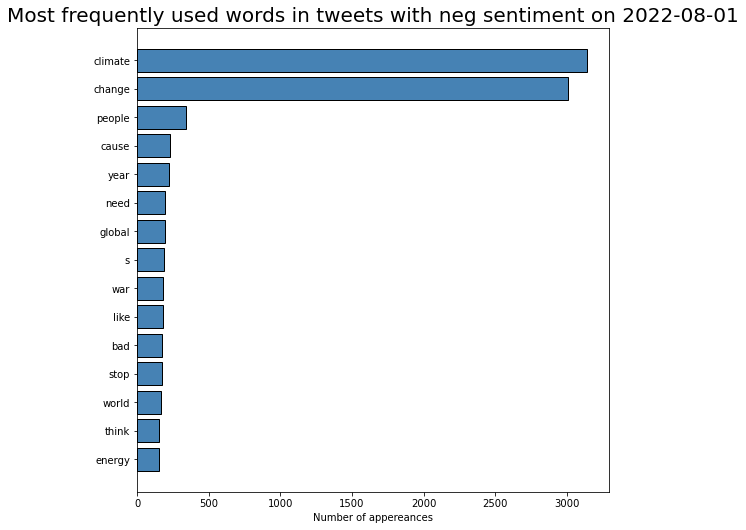

In [37]:
dates = pos.index
for date in dates:
    sub = neg_df[neg_df.index.date == date]
    common_words = find_common_words(sub)
    plot_common(common_words, f'Most frequently used words in tweets with neg sentiment on {date:%Y-%m-%d}')

/var/folders/87/clmyfqwn0kz2jfcyp0cbjycc0000gn/T/ipykernel_4862/2778204806.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  sub = neu_df[neu_df.index.date == date]


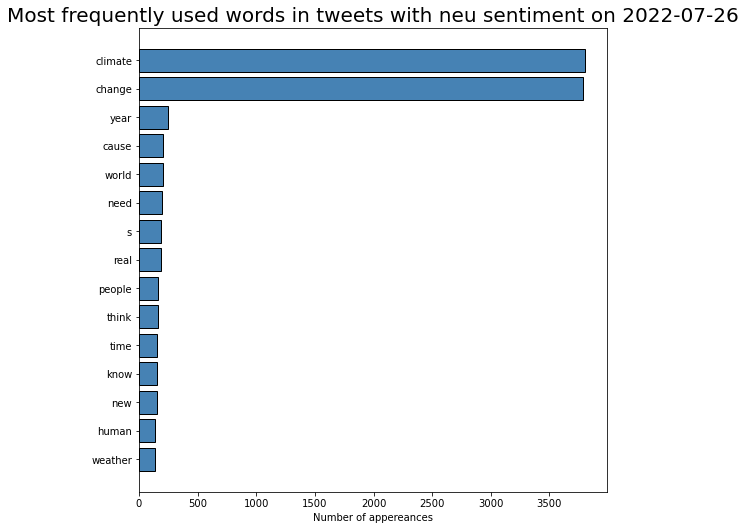

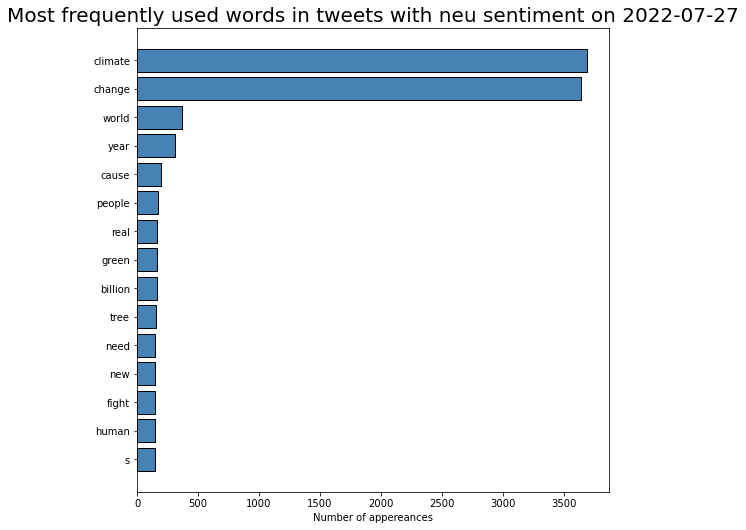

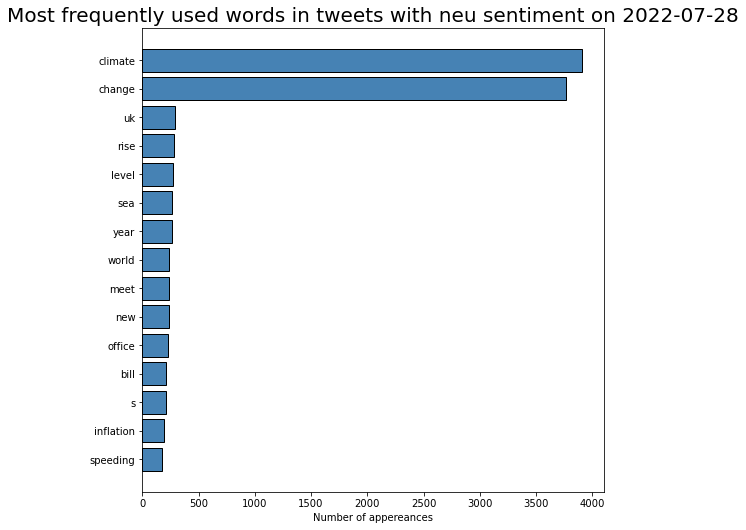

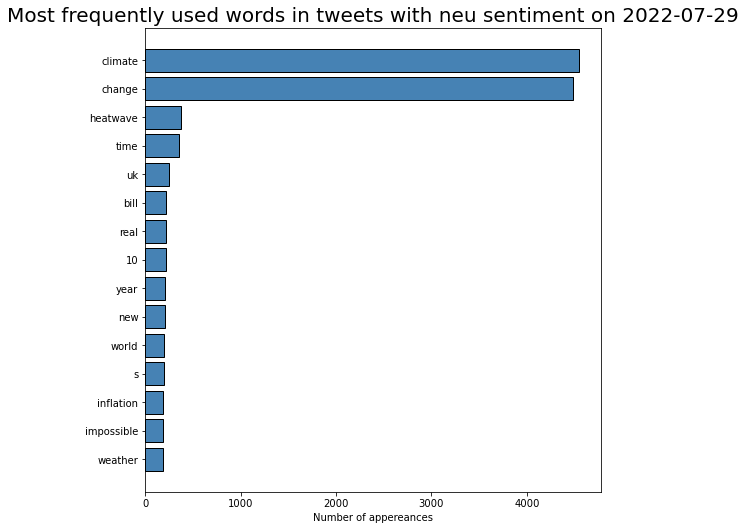

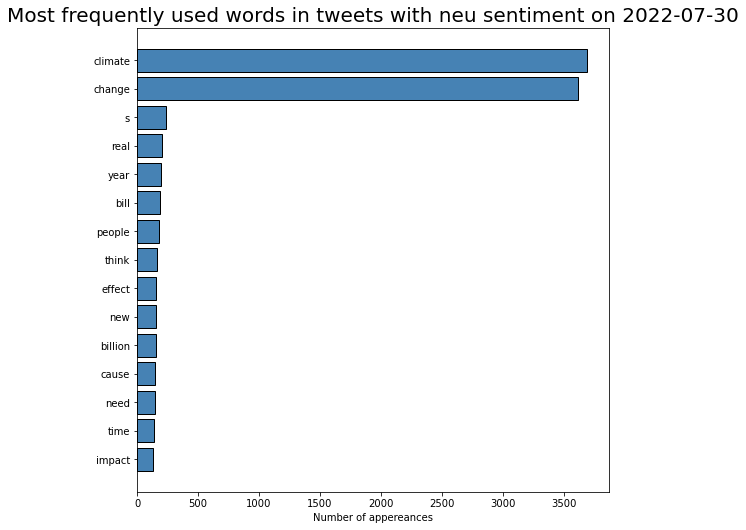

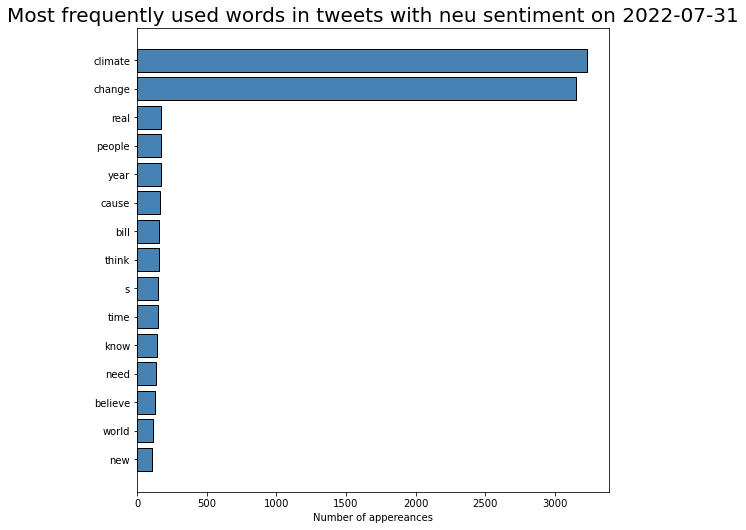

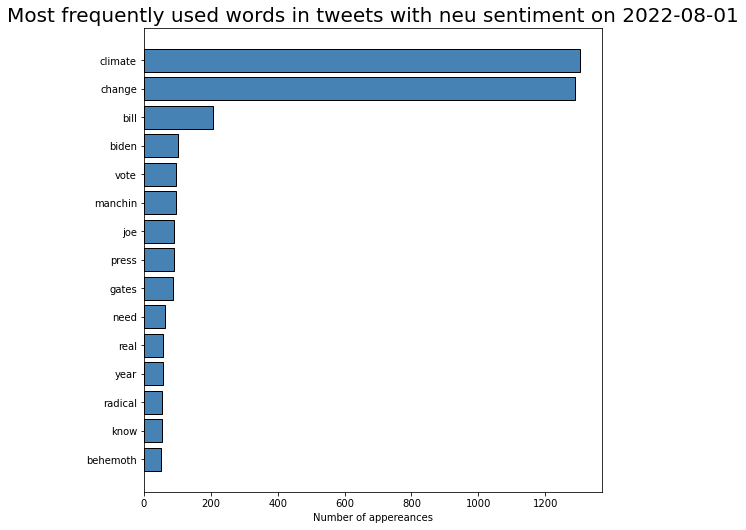

In [38]:
dates = pos.index
for date in dates:
    sub = neu_df[neu_df.index.date == date]
    common_words = find_common_words(sub)
    plot_common(common_words, f'Most frequently used words in tweets with neu sentiment on {date:%Y-%m-%d}')

In [61]:
dates = pos.index
for date in dates:
    print('-------------')
    print(date)
    print('-------------')
    sub = neu_df[neu_df.index.date == date]
    for tweet in sub[sub['tweet'].str.contains('sea level rise')]['tweet']:
        print()
        print(tweet)
        print()

-------------
2022-07-26 00:00:00
-------------

@the_transit_guy Effects of climate change (sea level rise, droughts, hurricanes, flooding, wildfire)


#MangroveDay 🌱Mangroves are threatened by soil erosion and sea level rise induced by #climatechange. The UNDP Safeguarding Rural Community Project, funded by Green Climate Fund and the govt of TL, strives to conserve mangroves to accelerate substantial actions for #climatechange https://t.co/OXG5megwYW


@GadSaad @SpeakerPelosi @BarackObama Isn’t it prophetic that President Obama bought a mansion in Martha’s Vineyard while also preaching that climate change will cause so much sea level rise that the eastern seaboard will flood


Sea isn’t a river, Where water will arrive, water won’t go back again in years https://t.co/uXaSMIvEno #GlobalWarming #ClimateChange 
How can states build resilience to sea level rise? Look to Louisiana https://t.co/DAR53aQapo

-------------
2022-07-27 00:00:00
-------------

You know….because climate change an

/var/folders/87/clmyfqwn0kz2jfcyp0cbjycc0000gn/T/ipykernel_4862/120503916.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  sub = neu_df[neu_df.index.date == date]


,tweet_id,tweet,like_count,quote_count,reply_count,retweet_count,clean,hashtags,clean_spacy,tmp,neg,pos,neu,compound,sentiment
created_at,,,,,,,,,,,,,,,
2022-07-26 05:40:02,1551804518148587521,@the_transit_guy Effects of climate change (se...,0.0,0.0,0.0,0.0,effects of climate change sea level rise droug...,[],effect climate change sea level rise drought h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neu
2022-07-26 07:32:11,1551832741943320577,#MangroveDay 🌱Mangroves are threatened by soil...,5.0,0.0,0.0,3.0,mangroves are threatened by soil erosion and s...,"['#mangroveday', '#climatechange.', '#climatec...",mangrove threaten soil erosion sea level rise ...,"{'neg': 0.067, 'neu': 0.846, 'pos': 0.087, 'co...",0.067,0.087,0.846,-0.0258,neu
2022-07-26 14:58:37,1551945089706070016,@GadSaad @SpeakerPelosi @BarackObama Isn’t it ...,0.0,0.0,0.0,0.0,isnt it prophetic that president obama bought ...,[],prophetic president obama buy mansion martha v...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neu
2022-07-26 14:27:46,1551937323041972234,"Sea isn’t a river, Where water will arrive, wa...",0.0,0.0,0.0,0.0,sea isnt a river where water will arrive water...,"['#globalwarming', '#climatechange']",sea river water arrive water year state build ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neu
